# BreastCancer Predict

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## 导入数据

In [2]:
data = load_breast_cancer()
data.data.shape

(569, 30)

## 数据建模

In [3]:
estimator = RandomForestClassifier(random_state=100)
score_pre = cross_val_score(estimator, data.data, data.target, cv=10).mean()
score_pre

0.9613721804511279

## 参数调节
### n_estimators

In [4]:
scores = []
for i in range(0, 200, 10):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=1, random_state=100)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scores.append(score)

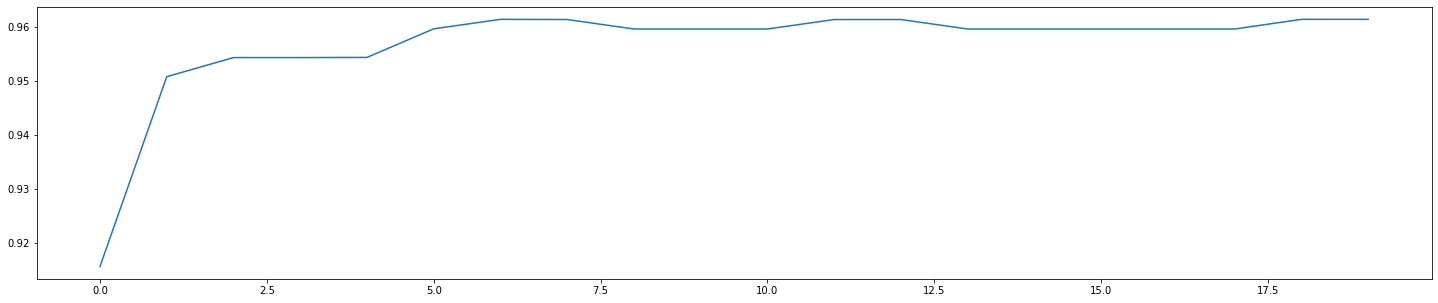

In [6]:
plt.figure(figsize=[25,5])
plt.plot(range(0, 20, 1), scores)

In [12]:
scores = []
for i in range(55, 66):
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=1, random_state=100)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scores.append(score)

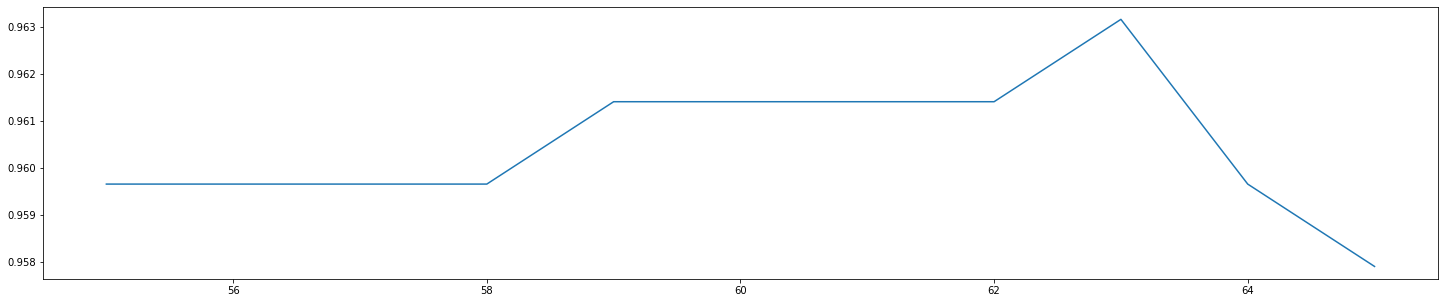

In [13]:
plt.figure(figsize=[25,5])
plt.plot(range(55, 66), scores)

In [19]:
max(scores)

0.9631578947368421

### 网格搜索

In [17]:
'''
params_grid = {'n_estimators': np.arange(0, 200, 100)}
params_grid = {'max_depth': np.arange(1, 20, 1)}
params_grid = {'max_leaf_nodes': np.arange(25, 50, 1)}
params_grid = {'min_samples_split': np.arange(0, 200, 100)}
params_grid = {'min_samples_leaf': np.arange(1, 10, 1)}
params_grid = {'criterion': ['gini', 'entropy']}
params_grid = {'max_features': np.arange(5, 30, 1)}
'''

"\nparams_grid = {'n_estimators': np.arange(0, 200, 100)}\nparams_grid = {'max_depth': np.arange(1, 20, 1)}\nparams_grid = {'max_leaf_nodes': np.arange(25, 50, 1)}\nparams_grid = {'min_samples_split': np.arange(0, 200, 100)}\nparams_grid = {'min_samples_leaf': np.arange(1, 10, 1)}\nparams_grid = {'criterion': ['gini', 'entropy']}\nparams_grid = {'max_features': np.arange(5, 30, 1)}\n"

#### max_depth

In [16]:
%time

rfc = RandomForestClassifier(n_estimators=63, random_state=100)
params_grid = {'max_depth': np.arange(1, 20, 1)}
gs = GridSearchCV(rfc, params_grid, cv=10)
gs.fit(data.data, data.target)

Wall time: 0 ns


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=63,
                                              random_state=100),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [18]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 9}
0.9631578947368421


#### max_feature

In [21]:
%time

rfc = RandomForestClassifier(n_estimators=63, random_state=100)
params_grid = {'max_features': np.arange(5, 30, 1)}
gs = GridSearchCV(rfc, params_grid, cv=10)
gs.fit(data.data, data.target)

Wall time: 0 ns


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=63,
                                              random_state=100),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [ ]:
print(gs.best_params_)
print(gs.best_score_)